Temperature IF  0.02922256565895487
WIND IF         0.04812703040826949
TRAFFIC JAM IF  0.15183550136234159


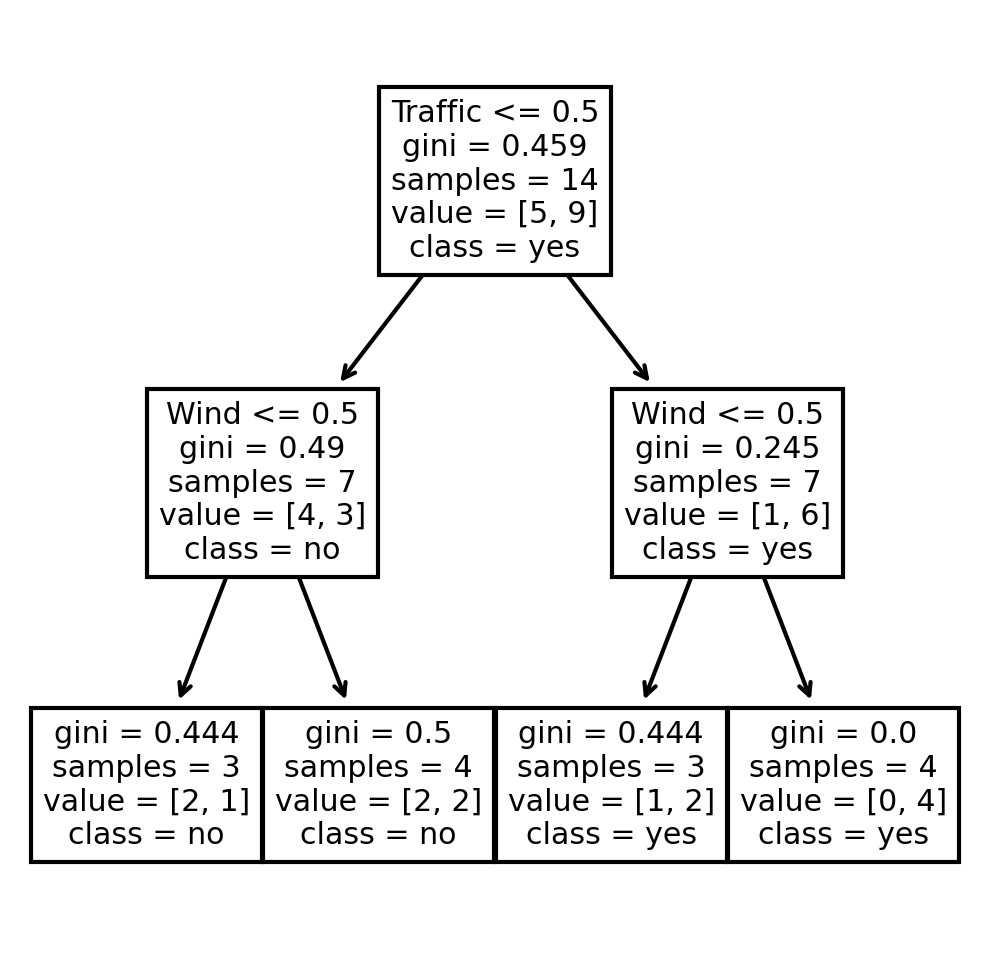

In [1]:
# THE DATA THAT MENTIONED IN QUESTION ,I WROTE MANUALLY IN THE PROGRAM 

# THE PYTHON CODE FOR THE ABOVE QUESTION IS:
import numpy as np
import pandas as pd
l0=["hot","hot","hot","mild","cool","cool","cool","mild","cool","mild","mild","mild","hot","mild"]
l1=["weak","strong","weak","weak","weak","strong","strong","weak","weak","weak","strong","strong","weak","strong"]
l2=["long","long","long","long","short","short","short","long","short","short","short","long","short","long"]
l3=["no","no","yes","yes","yes","no","yes","no","yes","yes","yes","yes","yes","no"]

df=pd.DataFrame([l0,l1,l2,l3]).T

from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
df[0]=l.fit_transform(df[0])
df[1]=l.fit_transform(df[1])
df[2]=l.fit_transform(df[2])
df[3]=l.fit_transform(df[3])
X=df.iloc[:,0:3]
Y=df.iloc[:,3]
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2, 
                            random_state = 0)
clf.fit(X, Y)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
features=['Temperature','Wind','Traffic']
labels=['no','yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(clf,
        feature_names = features,
        class_names=labels)
fig.savefig('imagename.png')
 
def entropy(target_col):
   elements,counts = np.unique(target_col,return_counts = True)
   entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
   return entropy

def InfoGain(data,split_attribute_name,target_name):  
   total_entropy = entropy(data[target_name])
   vals,counts= np.unique(data[split_attribute_name],return_counts=True)
   Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
   Information_Gain = total_entropy - Weighted_Entropy
   return Information_Gain

''' TO SELECT RROT NODE WE CALCULATED THE INFORMATION GAIN.'''
print("Temperature IF ",InfoGain(df,0,3))
print("WIND IF        ",InfoGain(df,1,3))
print("TRAFFIC JAM IF ",InfoGain(df,2,3))